In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import matplotlib as mpl

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
read_lens = od+expand(config['lr']['read_len_meta'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]

gene_subset = 'polya'

min_tpm = 1
gene_subset = 'polya'

## % of TSSs that are supported by GENCODE or our external assays

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2055: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2054: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 63636
Applying gene type and novelty subset
Number of tsss reported: 60428
154251
60428
     support  counts
0      Known   52603
1      Novel    1213
2  Supported    6612
   support_2  counts
0      Novel   11885
1  Supported   48543
12.95% (7825/60428) of tsss are novel
84.50% (6612/7825) of novel tsss are supported
2.01% (1213/60428) of tsss are novel and not supported by orthogonal data
80.33% (48543/60428) of tsss are supported by orthogonal data, regardless of novelty


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


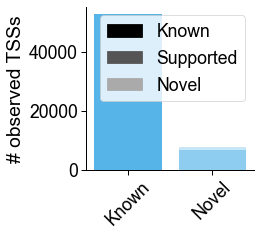

In [4]:
# when we add in our new support sources and remove unsupported ISMs; unspliced
feat = 'tss'
ref_sources = ref_source = ['v29', 'v40']
support_sources = support_source = ['encode_cage',
                                    'fantom_cage',
                                    'encode_rampage',
                                    'gtex',
                                    'pls',
                                    'encode_procap',
                                    'lrgasp_cage',
                                    'pol2',
                                    'ca_h3k4me3']


plt.figure(figsize=(3,3))
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()

plot_supported_feats_2(filt_ab=filt_ab,
                     h5=cerberus_h5,
                     feat=feat,
                     ref_sources=ref_source,
                     support_sources=support_source,
                     how=feat,
                     opref='figures/human',
                     gene_subset=gene_subset,
                     min_tpm=1,
                     ax=ax)

plt.subplots_adjust(wspace=0.35)

## What does the support look like at either end for different IC novelties? 
## -- double check whether this is plotting all vs just novel
## -- it's just novel

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2056: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2055: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 63636
Applying gene type and novelty subset
Number of tsss reported: 60428
154251
60428
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 228876
# isos >= 1 tpm: 206731
Applying gene type and novelty subset
Number of isos reported: 203134


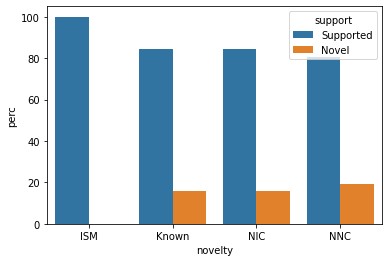

In [4]:
## What does TSS support look like for transcripts w/ ECs of different novelty?
feat = 'tss'
ref_sources = ref_source = ['v29', 'v40']
support_sources = support_source = ['encode_cage',
                                    'fantom_cage',
                                    'encode_rampage',
                                    'gtex',
                                    'pls',
                                    'encode_procap',
                                    'lrgasp_cage',
                                    'pol2',
                                    'ca_h3k4me3']
plot_end_support_by_ic_novelty(filt_ab, 
                               cerberus_h5,
                               feat,
                               ref_sources,
                               support_sources,
                               min_tpm,
                               gene_subset, 
                               ofile='figures/tss_support_by_ec_novelty.pdf')



## TSS support just in WTC11

Calculating tss TPM values
Subsetting for ['wtc11'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 22744
Applying gene type and novelty subset
Number of tsss reported: 22558
154251
22558
     support  counts
0      Known   20440
1      Novel      78
2  Supported    2040
   support_2  counts
0      Novel    1513
1  Supported   21045
9.39% (2118/22558) of tsss are novel
96.32% (2040/2118) of novel tsss are supported
0.35% (78/22558) of tsss are novel and not supported by orthogonal data
93.29% (21045/22558) of tsss are supported by orthogonal data, regardless of novelty


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


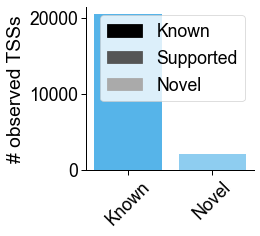

In [5]:
# what about tss support just in wtc11?
feat = 'tss'
ref_sources = ref_source = ['v29', 'v40']
support_sources = support_source = ['encode_cage',
                                    'fantom_cage',
                                    'encode_rampage',
                                    'gtex',
                                    'pls',
                                    'encode_procap',
                                    'lrgasp_cage',
                                    'pol2',
                                    'ca_h3k4me3']

plt.figure(figsize=(3,3))
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()

plot_supported_feats_2(filt_ab=filt_ab,
                     h5=cerberus_h5,
                     feat=feat,
                     ref_sources=ref_source,
                     support_sources=support_source,
                     how=feat,
                     opref='figures/human',
                     gene_subset=gene_subset,
                     min_tpm=1,
                     ax=ax,
                     sample=['wtc11'])

plt.subplots_adjust(wspace=0.35)
# plt.savefig(ofile, dpi=500, layout='tight', bbox_inches='tight')

## TSS support just in WTC11 just by WTC11 CAGE

Calculating tss TPM values
Subsetting for ['wtc11'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 22744
Applying gene type and novelty subset
Number of tsss reported: 22558
154251
22558
     support  counts
0      Known   20440
1      Novel     536
2  Supported    1582
   support_2  counts
0      Novel    4839
1  Supported   17719
9.39% (2118/22558) of tsss are novel
74.69% (1582/2118) of novel tsss are supported
2.38% (536/22558) of tsss are novel and not supported by orthogonal data
78.55% (17719/22558) of tsss are supported by orthogonal data, regardless of novelty


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:1059: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


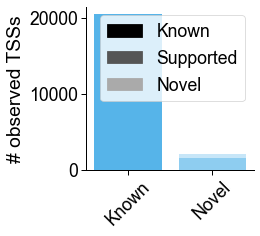

In [ ]:
# what about tss support just in wtc11? just by the wtc11 cage
feat = 'tss'
ref_sources = ref_source = ['v29', 'v40']
support_sources = support_source = ['lrgasp_cage']

plt.figure(figsize=(3,3))
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

ax = plt.gca()

plot_supported_feats_2(filt_ab=filt_ab,
                     h5=cerberus_h5,
                     feat=feat,
                     ref_sources=ref_source,
                     support_sources=support_source,
                     how=feat,
                     opref='figures/human',
                     gene_subset=gene_subset,
                     min_tpm=1,
                     ax=ax,
                     sample=['wtc11'])

plt.subplots_adjust(wspace=0.35)
# plt.savefig(ofile, dpi=500, layout='tight', bbox_inches='tight')

## What does TSS support look like for different samples versus the read depth?

In [11]:
df = pd.read_csv(read_lens, sep='\t')
df.rename({'Unnamed: 0': 'name'}, axis=1, inplace=True)
df['ENCODE_experiment_id'] = df['name'].str.split('_', expand=True)[0]
# add sample information
meta = pd.read_csv(lib_meta, sep='\t')
meta = meta[['ENCODE_experiment_id', 'sample']].drop_duplicates()
df = df.merge(meta, how='left', on='ENCODE_experiment_id')
df = df[['sample', 'aligned_reads']]
df = df.groupby('sample').sum().reset_index()

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import matplotlib as mpl

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)
    
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
read_lens = od+expand(config['lr']['read_len_meta'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]

gene_subset = 'polya'

min_tpm = 1
gene_subset = 'polya'

In [2]:
def get_perc_supported_feats(filt_ab,
                         ca,
                         feat,
                         support_sources,
                         **kwargs):
    """
    Get the % of features that are supported by a list of input sources

    Parameters:
        filt_ab (str): Path to of filtered abundance file
        ca (cerebrus annotation):cerberus annotation h5 object
        feat (str): {'tss', 'tes', 'ic'}
    """

    # get detected features
    df = pd.read_csv(filt_ab, sep='\t')
    df, ids = get_tpm_table(df, **kwargs)

    # get these features from cerberus
    if feat == 'tss':
        ca_df = ca.tss
    elif feat == 'tes':
        ca_df = ca.tes
    elif feat == 'ic':
        ca_df = ca.ic
    print(len(ca_df.index))
    df = ca_df.loc[ca_df.Name.isin(ids)]
    print(len(df.index))


    # get T/F detection of each feat by each source
    df = upsetplot.from_memberships(df.source.str.split(','), data=df)
    df.reset_index(inplace=True)

    # which sources are observed, which are supported, and which are known
    sources = ca.get_sources(df)

    df['support'] = 'Novel'
    if support_sources:
        df.loc[df[support_sources].any(axis=1), 'support'] = 'Supported'
    df = df[['Name', 'support']]
    
    df = df.groupby('support').count().reset_index()
    df.rename({'Name': 'counts'}, axis=1, inplace=True)

    n = df.counts.sum()
    n_num = df.loc[df.support=='Supported'].counts.sum()
    thing = (n_num/n)*100 
    return thing

In [3]:
ca = cerberus.read(cerberus_h5)

In [8]:
temp = pd.DataFrame(columns=['sample', 'perc_supp'])
samples = ca.triplets.loc[ca.triplets['sample'].notnull()]['sample'].unique().tolist()
feat = 'tss'
ref_sources = ref_source = ['v29', 'v40']
support_sources = support_source = ['encode_cage',
                                    'fantom_cage',
                                    'encode_rampage',
                                    'gtex',
                                    'pls',
                                    'encode_procap',
                                    'lrgasp_cage',
                                    'pol2',
                                    'ca_h3k4me3']

for s in samples:
    p = get_perc_supported_feats(filt_ab=filt_ab,
                 ca=ca,
                 feat=feat,
                 support_sources=support_source,
                 how=feat,
                 gene_subset=gene_subset,
                 min_tpm=1,
                 sample=[s])
    temp2 = pd.DataFrame()
    temp2['sample'] = [s]
    temp2['perc_supp'] = [p]
    temp = pd.concat([temp, temp2], axis=0)

Calculating tss TPM values
Subsetting for ['gm12878'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 25393
Applying gene type and novelty subset
Number of tsss reported: 24929
154251
24929
Calculating tss TPM values
Subsetting for ['mcf7'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 16986
Applying gene type and novelty subset
Number of tsss reported: 16848
154251
16848
Calculating tss TPM values
Subsetting for ['h9_panc_beta'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 16166
Applying gene type and novelty subset
Number of tsss reported: 16060
154251
16060
Calculating tss TPM values
Subsetting for ['hl60_m1_72hr'] samples
Subsetting for polya genes
Enforcing minimum TPM
Total # tsss detected: 72504
# tsss >= 1 tpm: 16725
Applying gene type and novelty subset
Number of tsss reported: 16557
154251
16557
Calculating t

In [10]:
temp.to_csv('human_per_supp_sample_tss.tsv', sep='\t')

In [12]:
df = df.merge(temp, on='sample', how='left')

In [13]:
df.head()

,sample,aligned_reads,perc_supp
0,a673,1731721,92.435574
1,adipose,1816266,94.568457
2,adrenal_gland,3017692,93.450031
3,brain,5484247,87.855904
4,brain_ad,13389290,89.724035


In [14]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
c_dict, order = get_biosample_colors()

[(0.0, 1000000.0),
 Text(0.5, 0, '# aligned reads'),
 Text(0, 0.5, '% supported TSSs')]

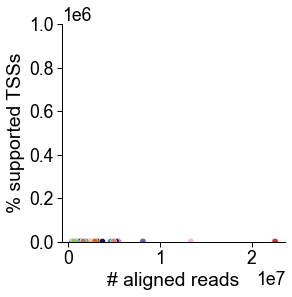

In [19]:
plt.figure(figsize=(4,4))
ax = sns.scatterplot(df, x='aligned_reads', y='perc_supp',
              hue='sample',
              palette=c_dict, s=40, alpha=1)
ax.get_legend().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = ax.set(ylim=(0,10**6), xlabel='# aligned reads', ylabel='% supported TSSs')

In [18]:
df.sort_values(by='aligned_reads', ascending=False)

,sample,aligned_reads,perc_supp
19,heart,22555551,87.248783
4,brain_ad,13389290,89.724035
36,lung,8169273,88.719824
3,brain,5484247,87.855904
33,k562,5277071,90.133392
49,vessels,4970344,88.846350
8,gm12878,4663228,89.450038
41,ovary,3760345,91.343039
7,colon,3239034,91.086995
20,hepg2,3167657,91.415181
